# Diabetes prediction

1. **Data Loading**

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
import torch.nn as nn

In [41]:
df = pd.read_csv("medical_students_dataset.csv")
df

,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
0,1.0,18.0,Female,161.777924,72.354947,O,27.645835,NaN,95.0,109.0,203.0,No,NaN
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
2,3.0,32.0,Female,182.537664,55.741083,A,16.729017,98.260293,76.0,130.0,216.0,Yes,No
3,NaN,30.0,Male,182.112867,63.332207,B,19.096042,98.839605,99.0,112.0,141.0,No,Yes
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,NaN,24.0,Male,176.503260,95.756997,B,30.737254,99.170685,65.0,121.0,130.0,No,No
199996,99997.0,29.0,Female,163.917675,45.225194,NaN,16.831734,97.865785,62.0,125.0,198.0,No,Yes
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No


**Number of attributes and number of records**

In [42]:
# show the number of attributes and records in the dataset
df.shape


(200000, 13)

**Show the statistics of the dataset**

In [43]:
df.describe()

,Student ID,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol
count,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,49974.042078,26.021561,174.947103,69.971585,23.338869,98.600948,79.503767,114.558033,184.486361
std,28879.641657,4.890528,14.447560,17.322574,7.033554,0.500530,11.540755,14.403353,37.559678
min,1.000000,18.000000,150.000041,40.000578,10.074837,96.397835,60.000000,90.000000,120.000000
25%,24971.750000,22.000000,162.476110,54.969838,17.858396,98.264750,70.000000,102.000000,152.000000
50%,49943.500000,26.000000,174.899914,69.979384,22.671401,98.599654,80.000000,115.000000,184.000000
75%,74986.000000,30.000000,187.464417,84.980097,27.997487,98.940543,90.000000,127.000000,217.000000
max,100000.000000,34.000000,199.998639,99.999907,44.355113,100.824857,99.000000,139.000000,249.000000


**Data Visualization**

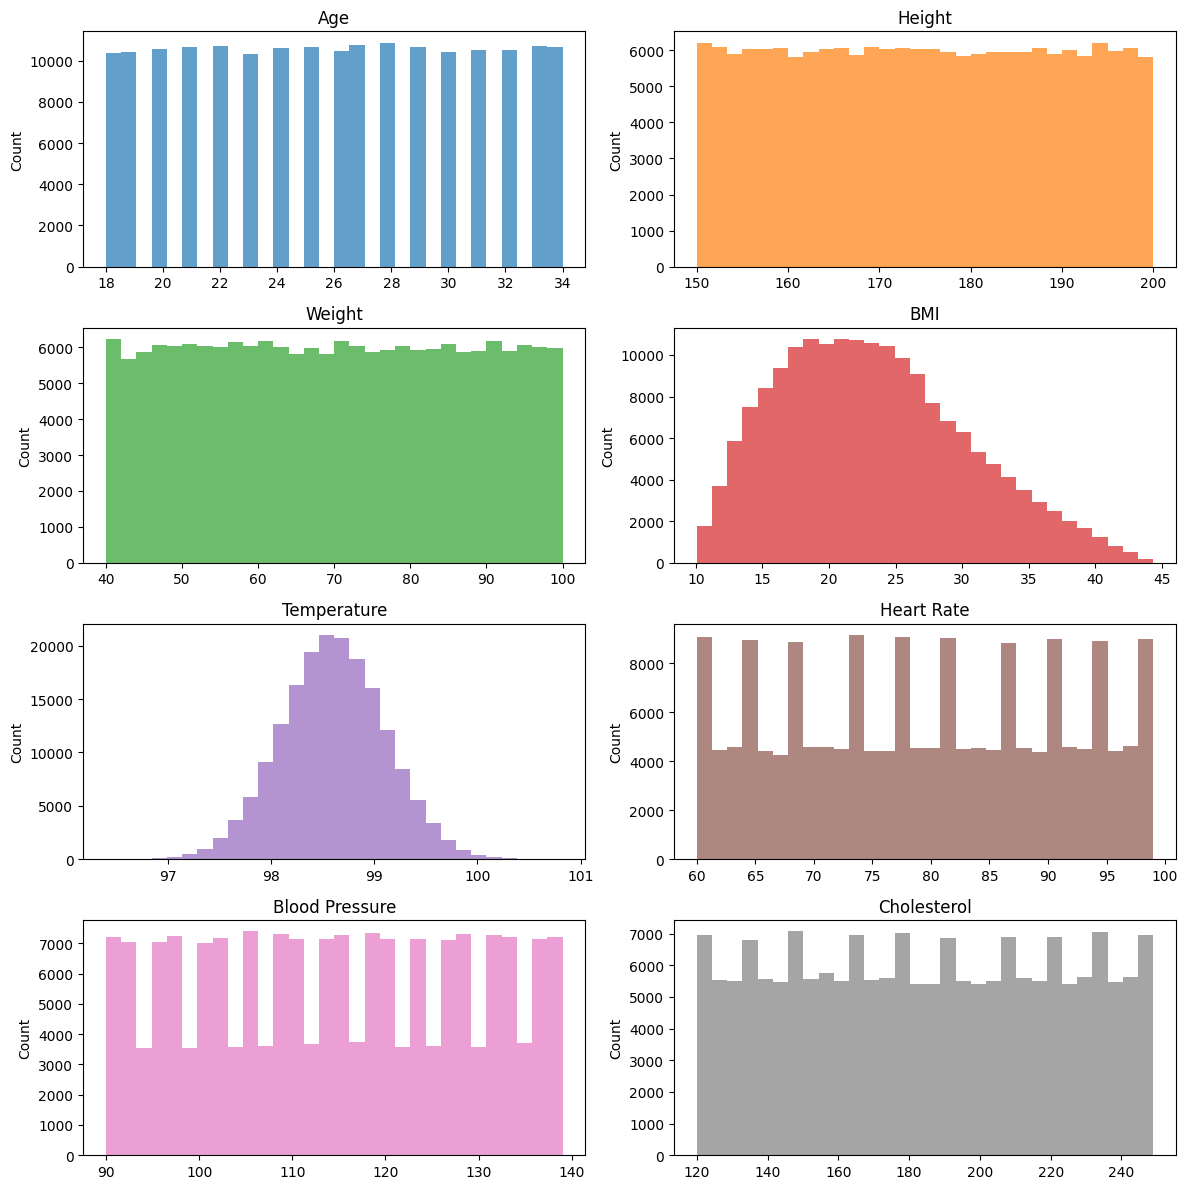

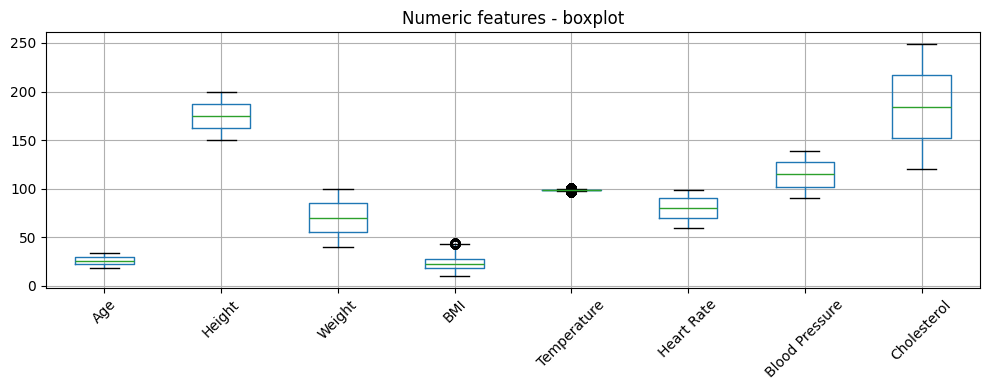

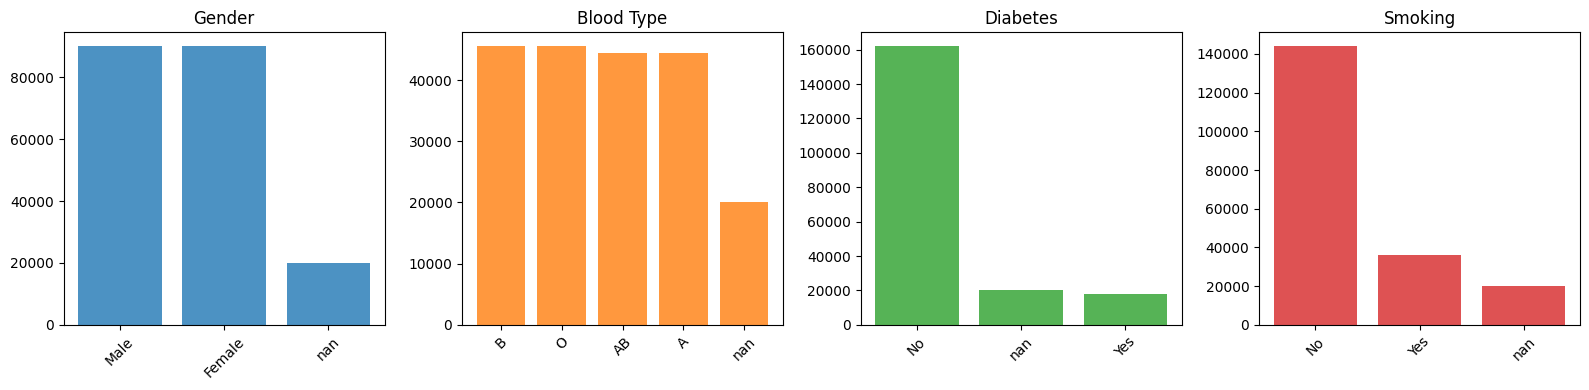

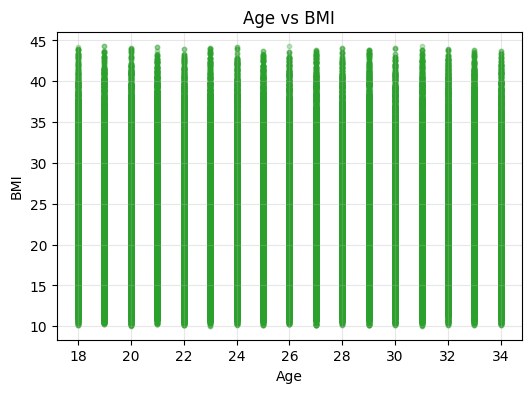

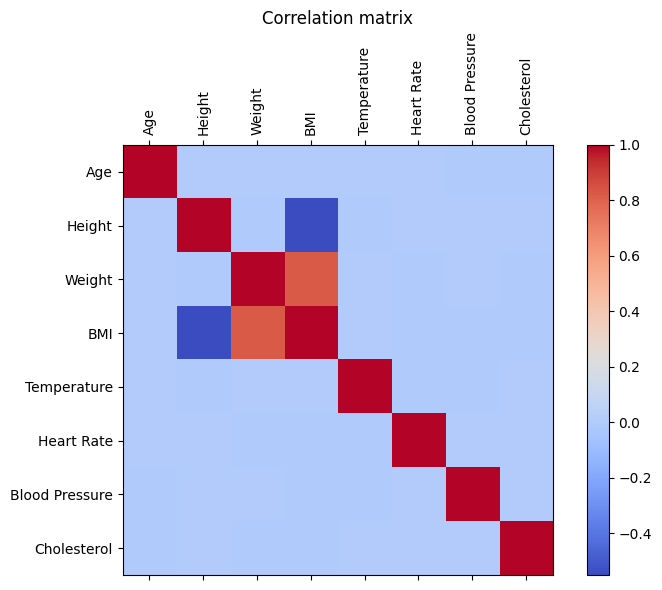

In [44]:
# use matplotlib to visualize the dataset
# numeric distributions (histograms)
numeric_cols = ['Age','Height','Weight','BMI','Temperature','Heart Rate','Blood Pressure','Cholesterol']
fig, axs = plt.subplots(4, 2, figsize=(12, 12))
axs = axs.ravel()
for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col].dropna(), bins=30, color=f'C{i}', alpha=0.7)
    axs[i].set_title(col)
    axs[i].set_ylabel('Count')
plt.tight_layout()
plt.show()

# boxplots for numeric features
fig, ax = plt.subplots(figsize=(10, 4))
df[numeric_cols].boxplot(ax=ax)
ax.set_title('Numeric features - boxplot')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# categorical distributions (bar charts)
cat_cols = ['Gender', 'Blood Type', 'Diabetes', 'Smoking']
fig, axs = plt.subplots(1, len(cat_cols), figsize=(16, 4))
for i, col in enumerate(cat_cols):
    counts = df[col].value_counts(dropna=False)
    axs[i].bar(counts.index.astype(str), counts.values, color=f'C{i}', alpha=0.8)
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# scatter: Age vs BMI
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['BMI'], s=10, alpha=0.3, color='C2')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('Age vs BMI')
plt.grid(alpha=0.3)
plt.show()

# correlation matrix (heatmap using matplotlib)
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr, cmap='coolwarm')
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90)
ax.set_yticklabels(numeric_cols)
ax.set_title('Correlation matrix')
plt.tight_layout()
plt.show()

**Count the number of missing values**

In [45]:
# count missing values per column and total, plus percentage
missing_per_col = df.isnull().sum()
total_missing = missing_per_col.sum()
missing_pct = (missing_per_col / len(df)) * 100

print("Missing values per column:")
print(missing_per_col)
print(f"\nTotal missing values: {total_missing}")
print("\nMissing percentage per column:")
print(missing_pct.round(2))

Missing values per column:
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BMI               20000
Temperature       20000
Heart Rate        20000
Blood Pressure    20000
Cholesterol       20000
Diabetes          20000
Smoking           20000
dtype: int64

Total missing values: 260000

Missing percentage per column:
Student ID        10.0
Age               10.0
Gender            10.0
Height            10.0
Weight            10.0
Blood Type        10.0
BMI               10.0
Temperature       10.0
Heart Rate        10.0
Blood Pressure    10.0
Cholesterol       10.0
Diabetes          10.0
Smoking           10.0
dtype: float64


**Number of duplicate values in the dataset**

In [46]:
# count duplicate rows (excluding the first occurrence), all rows that are part of duplicates,
# and number of unique duplicate groups
dup_excluding_first = df.duplicated().sum()
dup_all_occurrences = df.duplicated(keep=False).sum()
unique_dup_groups = df[df.duplicated(keep=False)].drop_duplicates().shape[0]

print(f"Duplicate rows (excluding first occurrence): {dup_excluding_first}")
print(f"Rows that are part of duplicates (including all occurrences): {dup_all_occurrences}")
print(f"Unique duplicate groups: {unique_dup_groups}")

Duplicate rows (excluding first occurrence): 7644
Rows that are part of duplicates (including all occurrences): 15288
Unique duplicate groups: 7644


**Duplicate count excluding student Id**

In [47]:
subset = df.columns.difference(['Student ID'])
dup_excluding_first = df.duplicated(subset=subset).sum()
dup_all_occurrences = df.duplicated(subset=subset, keep=False).sum()
unique_dup_groups = df[df.duplicated(subset=subset, keep=False)].drop_duplicates(subset=subset).shape[0]

print(f"Duplicate rows (excluding first occurrence): {dup_excluding_first}")
print(f"Rows that are part of duplicates (including all occurrences): {dup_all_occurrences}")
print(f"Unique duplicate groups: {unique_dup_groups}")

Duplicate rows (excluding first occurrence): 9296
Rows that are part of duplicates (including all occurrences): 18592
Unique duplicate groups: 9296


In [48]:
# find Student ID values that appear more than once and show corresponding rows
dup_mask = df['Student ID'].notna() & df['Student ID'].duplicated(keep=False)
dup_counts = df.loc[dup_mask, 'Student ID'].value_counts()

print("Duplicated Student ID counts:")
print(dup_counts)

# display all rows with duplicated Student ID, sorted by Student ID
df.loc[dup_mask].sort_values('Student ID')

Duplicated Student ID counts:
Student ID
2.0         2
5.0         2
6.0         2
7.0         2
8.0         2
           ..
99993.0     2
99995.0     2
99998.0     2
99999.0     2
100000.0    2
Name: count, Length: 81024, dtype: int64


,Student ID,Age,Gender,Height,Weight,Blood Type,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Diabetes,Smoking
100001,2.0,34.0,Male,152.069157,47.630941,B,20.597139,98.714977,93.0,104.0,163.0,No,No
1,2.0,NaN,Male,152.069157,47.630941,B,NaN,98.714977,93.0,104.0,163.0,No,No
100004,5.0,23.0,Female,179.339293,46.234173,O,14.375143,98.480008,95.0,139.0,231.0,No,No
4,5.0,23.0,Female,NaN,46.234173,O,NaN,98.480008,95.0,NaN,231.0,No,No
5,6.0,32.0,NaN,151.491294,68.647805,B,29.912403,99.668373,70.0,128.0,183.0,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199997,99998.0,34.0,Female,NaN,99.648914,NaN,33.189303,98.768210,60.0,90.0,154.0,NaN,No
99998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,NaN,106.0,NaN,No,No
199998,99999.0,30.0,Female,156.446944,50.142824,A,20.486823,98.994212,61.0,106.0,225.0,No,No
199999,100000.0,20.0,Female,153.927410,99.928405,O,42.175189,98.595817,95.0,133.0,132.0,NaN,No


# Data Cleaning

In [49]:
# if the target column 'Diabetes' is missing, drop those rows
df = df.dropna(subset=['Diabetes'])
# excluding Student ID column, drop duplicate rows keeping the first occurrence
subset = df.columns.difference(['Student ID'])
df = df.drop_duplicates(subset=subset, keep='first')
# if there is any missing value in numeric columns, fill with mean of that column
for col in numeric_cols:    
    if df[col].isnull().any():
        mean_value = df[col].mean()
        df[col] = df[col].fillna(mean_value)

# for categorical columns, fill missing values with the mode (most frequent value)
for col in cat_cols:
    if df[col].isnull().any():
        mode_value = df[col].mode()[0]
        df[col] = df[col].fillna(mode_value)
# verify no missing values remain
df.isnull().sum()

Student ID        16987
Age                   0
Gender                0
Height                0
Weight                0
Blood Type            0
BMI                   0
Temperature           0
Heart Rate            0
Blood Pressure        0
Cholesterol           0
Diabetes              0
Smoking               0
dtype: int64

# Creation of Input/Output Features

In [50]:
# split the data into two parts. The “Features” variable will consist of all the columns
# in the dataset except the target column. And the “Labels” variable will contain only the target
# column
X = df.drop(columns=['Diabetes', 'Student ID'])
y = df['Diabetes']

**Conversion of features into numeric values**

In [51]:
# convert categorical features into numerical using one-hot encoding
# create variable feature_col_cols exluding diabetes from cat_cols
feature_cat_cols = [col for col in cat_cols if col != 'Diabetes']
X = pd.get_dummies(X, columns=feature_cat_cols, drop_first=True)
# y also contains categorical values, convert to numerical
y = y.map({'No': 0, 'Yes': 1})
X

,Age,Height,Weight,BMI,Temperature,Heart Rate,Blood Pressure,Cholesterol,Gender_Male,Blood Type_AB,Blood Type_B,Blood Type_O,Smoking_Yes
0,18.000000,161.777924,72.354947,27.645835,98.601285,95.0,109.000000,203.000000,False,False,False,True,False
1,26.027241,152.069157,47.630941,23.348436,98.714977,93.0,104.000000,163.000000,True,False,True,False,False
2,32.000000,182.537664,55.741083,16.729017,98.260293,76.0,130.000000,216.000000,False,False,False,False,False
3,30.000000,182.112867,63.332207,19.096042,98.839605,99.0,112.000000,141.000000,True,False,True,False,True
4,23.000000,174.946022,46.234173,23.348436,98.480008,95.0,114.564256,231.000000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199993,22.000000,174.946022,46.155224,23.348436,98.331019,93.0,100.000000,184.483653,True,False,False,False,False
199994,22.000000,159.486907,70.007679,27.631082,98.971976,86.0,134.000000,208.000000,True,False,False,False,False
199995,24.000000,176.503260,95.756997,30.737254,99.170685,65.0,121.000000,130.000000,True,False,True,False,False
199996,29.000000,163.917675,45.225194,16.831734,97.865785,62.0,125.000000,198.000000,False,False,False,True,True


**Train-validation-test stratified split**

In [52]:
from sklearn.model_selection import train_test_split
# step 1: train vs temp

X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.30,
    stratify=y,
    random_state=42
)

# step 2: validation vs test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    stratify=y_temp,
    random_state=42
)

**Feature Scaling**


In [53]:
def scale_data(X_train, X_val, X_test, numeric_cols, scaler):
    X_tr = X_train.copy()
    X_va = X_val.copy()
    X_te = X_test.copy()

    X_tr[numeric_cols] = scaler.fit_transform(X_tr[numeric_cols])
    X_va[numeric_cols] = scaler.transform(X_va[numeric_cols])
    X_te[numeric_cols] = scaler.transform(X_te[numeric_cols])
    return X_tr, X_va, X_te, scaler


In [54]:
SCALERS = {
    'standard': StandardScaler(),
    'minmax': MinMaxScaler()
}

**Correlation Analysis and Feature Selection**

In [55]:
def correlation_analysis_and_feature_selection(
    X_train,
    y_train,
    k=10,
    show_matrix=True,
    show_scatter=True
):
    """
    Performs correlation analysis, visualization, and top-k feature selection.

    Parameters:
    X_train (pd.DataFrame): Scaled training features
    y_train (pd.Series or np.array): Target variable
    k (int): Number of top correlated features to select
    show_matrix (bool): Whether to display correlation matrix heatmap
    show_scatter (bool): Whether to show 1D scatter plots

    Returns:
    list: Top-k selected feature names
    pd.DataFrame: Correlation values with target
    """

    # Combine features and target for correlation
    df_corr = X_train.copy()
    df_corr["target"] = y_train.values

    # 1️⃣ Correlation of every column with target
    corr_with_target = df_corr.corr()["target"].drop("target")

    corr_df = (
        corr_with_target
        .abs()
        .sort_values(ascending=False)
        .to_frame(name="abs_correlation")
    )

    print("Correlation of each feature with the target:\n")
    display(corr_df)

    # 2️⃣ Correlation matrix visualization
    if show_matrix:
        plt.figure(figsize=(10, 8))
        sns.heatmap(
            df_corr.corr(),
            cmap="coolwarm",
            center=0,
            linewidths=0.5
        )
        plt.title("Correlation Matrix")
        plt.show()

    # 3️⃣ Select top-k features
    top_features = corr_df.head(k).index.tolist()

    print(f"\nTop {k} features based on absolute correlation:")
    print(top_features)

    # 4️⃣ 1D scatter plots vs target
    if show_scatter:
        for col in top_features:
            plt.figure(figsize=(6, 4))
            plt.scatter(
                X_train[col],
                y_train,
                alpha=0.5
            )
            plt.xlabel(col)
            plt.ylabel("Target")
            plt.title(f"{col} vs Target")
            plt.show()

    return top_features, corr_df


**Correlation analysis using StandardScaler**

Correlation of each feature with the target:



,abs_correlation
Temperature,0.010034
Height,0.006265
Gender_Male,0.004589
Age,0.004007
Cholesterol,0.002540
Blood Type_AB,0.002126
Heart Rate,0.001956
Smoking_Yes,0.001376
Blood Pressure,0.001247
Blood Type_O,0.000938


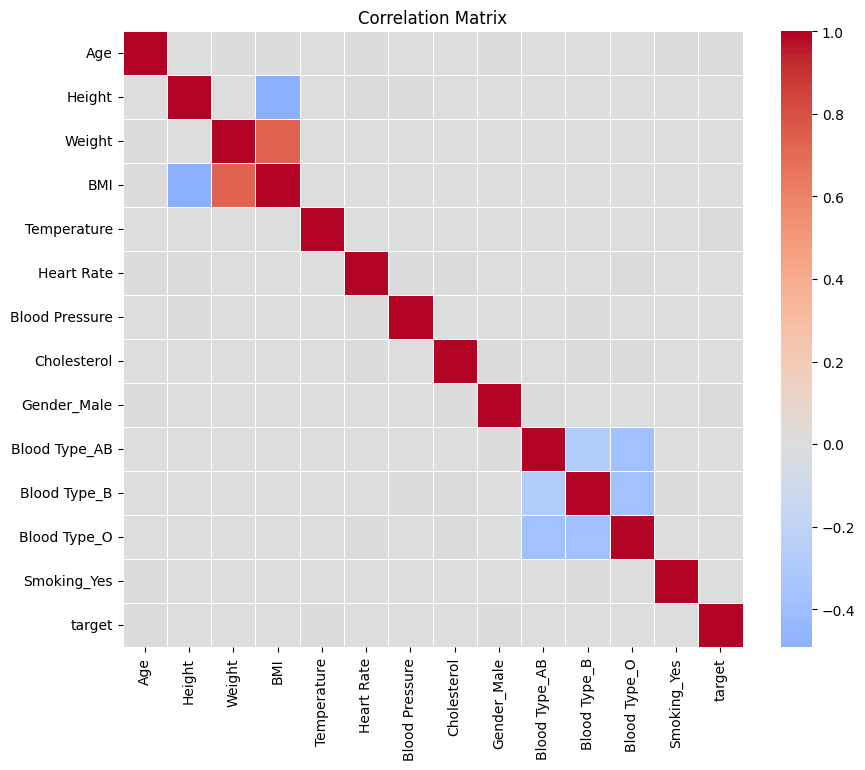


Top 10 features based on absolute correlation:
['Temperature', 'Height', 'Gender_Male', 'Age', 'Cholesterol', 'Blood Type_AB', 'Heart Rate', 'Smoking_Yes', 'Blood Pressure', 'Blood Type_O']


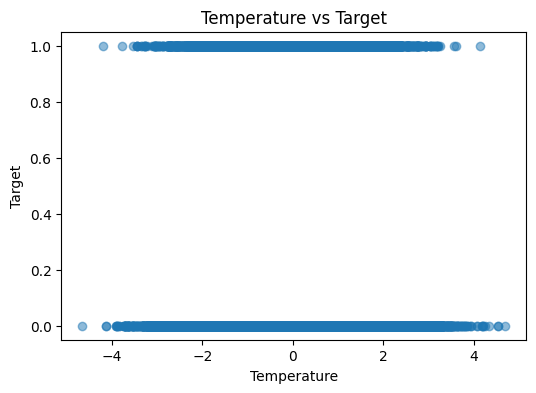

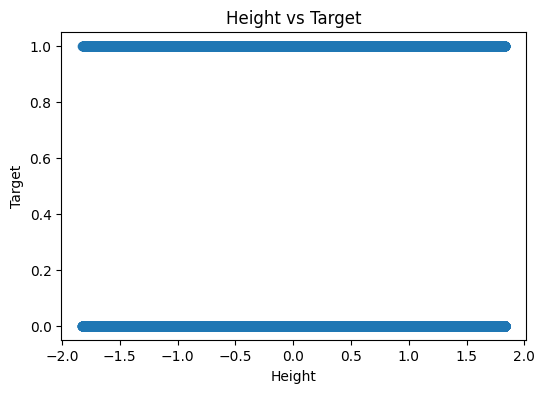

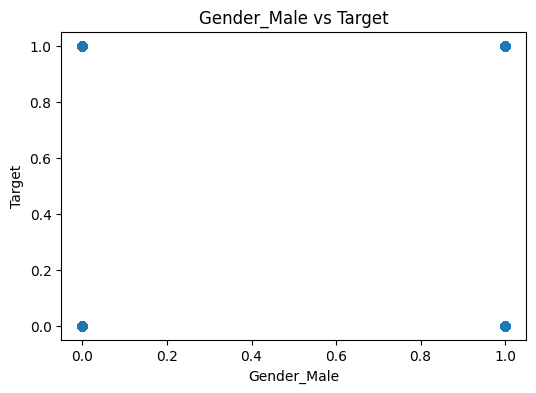

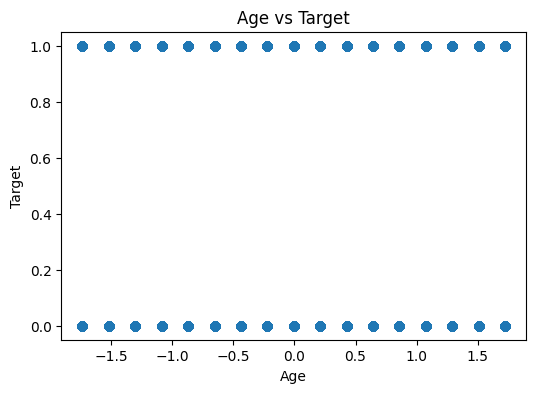

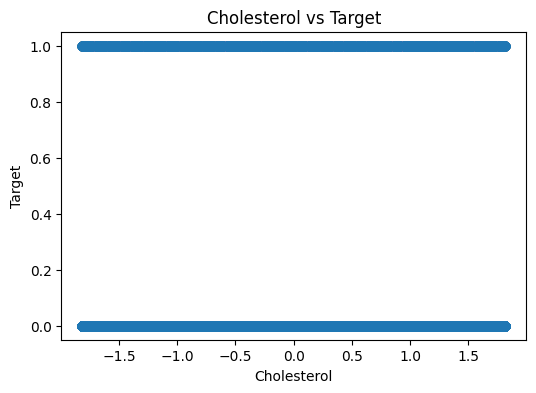

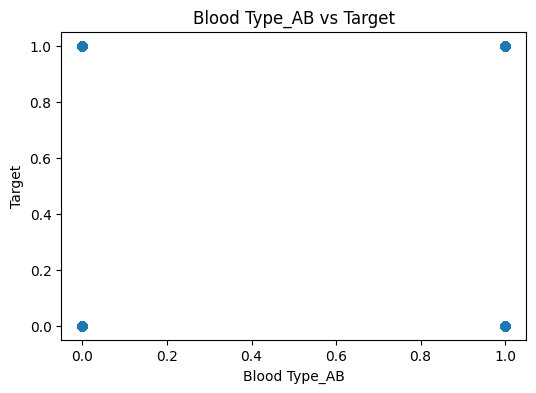

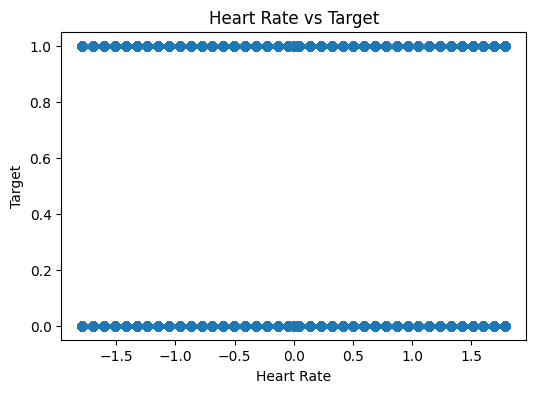

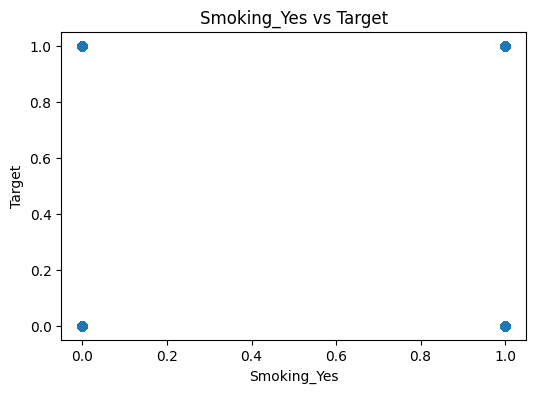

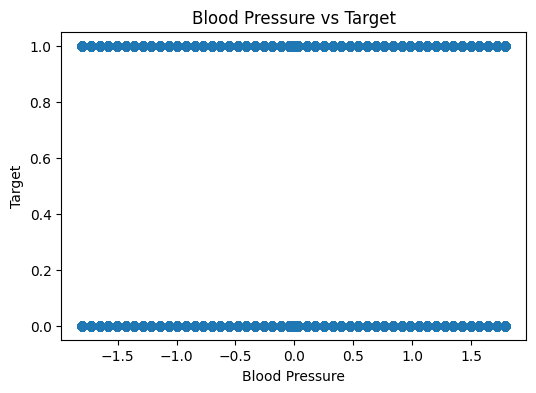

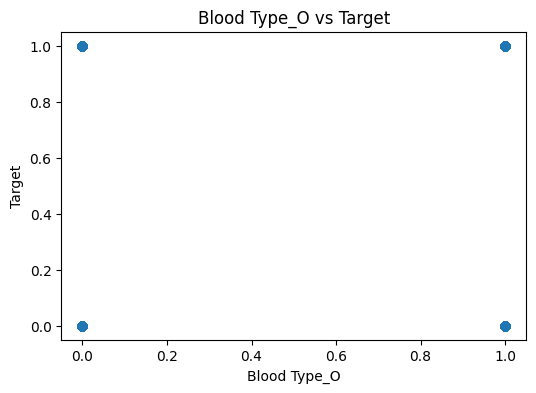

Selected Features: ['Temperature', 'Height', 'Gender_Male', 'Age', 'Cholesterol', 'Blood Type_AB', 'Heart Rate', 'Smoking_Yes', 'Blood Pressure', 'Blood Type_O']


In [56]:
X_train_standard, X_val_standard, X_test_standard, standard_scaler = scale_data(
    X_train, X_val, X_test, numeric_cols, SCALERS['standard']
)
# call the function to perform correlation analysis and feature selection
selected_features, corr_values = correlation_analysis_and_feature_selection(X_train_standard, y_train, k=10)
# print selected features
print("Selected Features:", selected_features)

# Feed Forward Model architectures
- Each model has 2-3 hidden layers, small enough for cpu

In [57]:
# Base FNN (2-hidden layers)
class FNN_2Layer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

In [58]:
# FNN with 3 hidden layers
class FNN_3Layer(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)


In [59]:
# FNN with dropout (regularized)
class FNN_Dropout(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)


In [60]:
# Wider but shallow FNN
class FNN_Wide(nn.Module):
    def __init__(self, input_dim, num_classes):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 64),
            nn.ReLU(),
            nn.Linear(64, num_classes)
        )

    def forward(self, x):
        return self.net(x)


**Model factory**

In [61]:
def get_model(model_name, input_dim, num_classes):
    models = {
        "fnn_2layer": FNN_2Layer,
        "fnn_3layer": FNN_3Layer,
        "fnn_dropout": FNN_Dropout,
        "fnn_wide": FNN_Wide
    }

    if model_name not in models:
        raise ValueError(f"Unknown model: {model_name}")

    return models[model_name](input_dim, num_classes)


**Training loop**

In [62]:

from sklearn.utils.class_weight import compute_class_weight

def train_model(
    model,
    train_loader,
    val_loader,
    num_epochs=20,
    lr=1e-3, 
    device="cpu"
):
    # Setup for class weights (as per your notebook)
    class_weights = compute_class_weight(
        class_weight="balanced",
        classes=np.array([0, 1]),
        y=y_train.values
    )
    class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    model.to(device)

    # Initialize history dictionary
    history = {"train_loss": [], "val_loss": []}

    for epoch in range(num_epochs):
        # --- Training Phase ---
        model.train()
        running_train_loss = 0.0
        for X, y in train_loader:
            X, y = X.to(device), y.to(device)

            outputs = model(X)
            loss = criterion(outputs, y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            running_train_loss += loss.item()

        # --- Validation Phase ---
        model.eval()
        running_val_loss = 0.0
        correct, total = 0, 0
        with torch.no_grad():
            for X, y in val_loader:
                X, y = X.to(device), y.to(device)
                outputs = model(X)
                
                # Calculate Validation Loss
                loss = criterion(outputs, y)
                running_val_loss += loss.item()
                
                # Calculate Accuracy (optional for the plot, but good for logs)
                preds = torch.argmax(outputs, dim=1)
                correct += (preds == y).sum().item()
                total += y.size(0)

        # Average losses for the epoch
        epoch_train_loss = running_train_loss / len(train_loader)
        epoch_val_loss = running_val_loss / len(val_loader)
        val_acc = correct / total

        # Save to history
        history["train_loss"].append(epoch_train_loss)
        history["val_loss"].append(epoch_val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {epoch_train_loss:.4f} - Val Loss: {epoch_val_loss:.4f} - Val Acc: {val_acc:.4f}")

    return model, history # Return history alongside the model


In [63]:
# plot loss curves

def plot_loss_curves(history, model_label):
    plt.figure(figsize=(10, 6))
    epochs = range(1, len(history['train_loss']) + 1)
    
    plt.plot(epochs, history['train_loss'], 'bo-', label='Training Loss')
    plt.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss')
    
    plt.title(f'Training and Validation Loss: {model_label}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

**Evaluation Function**

In [64]:
def evaluate_model(model, test_loader, device="cpu"):
    model.eval()
    correct, total = 0, 0

    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            preds = torch.argmax(outputs, dim=1)
            correct += (preds == y).sum().item()
            total += y.size(0)

    return correct / total


**Tabular Dataset**

In [65]:
from torch.utils.data import Dataset

class TabularDataset(torch.utils.data.Dataset):
    def __init__(self, X, y):
        # Force numeric + float32
        self.X = torch.tensor(
            X.astype(np.float32).values,
            dtype=torch.float32
        )
        self.y = torch.tensor(
            y.values,
            dtype=torch.long
        )

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]



**Evaluate final model**

In [66]:
import torch
import numpy as np

def get_test_predictions(model, test_loader, device="cpu"):
    model.eval()

    y_true = []
    y_pred = []
    y_prob = []

    with torch.no_grad():
        for X, y in test_loader:
            X = X.to(device)
            y = y.to(device)

            outputs = model(X)                # logits
            probs = torch.softmax(outputs, dim=1)[:, 1]  # P(class=1)
            preds = torch.argmax(outputs, dim=1)

            y_true.extend(y.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())
            y_prob.extend(probs.cpu().numpy())

    return (
        np.array(y_true),
        np.array(y_pred),
        np.array(y_prob)
    )

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    f1_score,
    roc_auc_score
)

def compute_classification_metrics(y_true, y_pred, y_prob):
    metrics = {
        "accuracy": accuracy_score(y_true, y_pred),
        "precision": precision_score(y_true, y_pred,zero_division=0),
        "f1_score": f1_score(y_true, y_pred),
        "auroc": roc_auc_score(y_true, y_prob)
    }
    return metrics

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(y_true, y_prob):
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)

    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {auc:.4f}")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

def evaluate_final_model(model, test_loader, device="cpu"):
    y_true, y_pred, y_prob = get_test_predictions(
        model, test_loader, device
    )

    # print y_true, y_pred, y_prob
    print("y_true:", y_true)
    print("y_pred:", y_pred)
    print("y_prob:", y_prob)

    metrics = compute_classification_metrics(
        y_true, y_pred, y_prob
    )

    print("\nFinal Test Set Performance:")
    print(f"Accuracy  : {metrics['accuracy']:.4f}")
    print(f"Precision : {metrics['precision']:.4f}")
    print(f"F1-score  : {metrics['f1_score']:.4f}")
    print(f"AUROC     : {metrics['auroc']:.4f}")

    plot_roc_curve(y_true, y_prob)

    return metrics


# Experiment Configs

In [67]:
MODELS = [
    "fnn_2layer",
    "fnn_3layer",
    "fnn_dropout",
    "fnn_wide"
]

DEVICE = "cpu"
NUM_CLASSES = 2
TOP_K = 10

# Prepare Dataloaders

In [68]:
from torch.utils.data import DataLoader

def create_dataloaders(X_tr, X_va, X_te, y_tr, y_va, y_te, batch_size=32):
    train_ds = TabularDataset(X_tr, y_tr)
    val_ds   = TabularDataset(X_va, y_va)
    test_ds  = TabularDataset(X_te, y_te)

    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
    val_loader   = DataLoader(val_ds, batch_size=batch_size, shuffle=False)
    test_loader  = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    return train_loader, val_loader, test_loader


# Experiment Runner

In [ ]:
def run_experiments(
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    numeric_cols
):
    experiment_results = []
    trained_models = {}

    for scaler_name, scaler in SCALERS.items():
        print(f"\n==============================")
        print(f"Scaler: {scaler_name}")
        print(f"==============================")

        # Scale data
        X_tr, X_va, X_te, _ = scale_data(
            X_train, X_val, X_test,
            numeric_cols=numeric_cols,
            scaler=scaler
        )

        # Correlation analysis + top-10 feature selection
        top_features, corr_df = correlation_analysis_and_feature_selection(
            X_tr, y_train, k=TOP_K
        )

        # Apply feature selection
        X_tr_sel = X_tr[top_features]
        X_va_sel = X_va[top_features]
        X_te_sel = X_te[top_features]

        # Create DataLoaders
        train_loader, val_loader, test_loader = create_dataloaders(
            X_tr_sel, X_va_sel, X_te_sel,
            y_train, y_val, y_test
        )

        for model_name in MODELS:
            print(f"\nTraining Model: {model_name}")

            # Select model
            model = get_model(
                model_name=model_name,
                input_dim=X_tr_sel.shape[1],
                num_classes=NUM_CLASSES
            )

            # Train model (Modified to capture history)
            model, history = train_model(
                model,
                train_loader,
                val_loader,
                num_epochs=20,
                device=DEVICE
            )

            # Validation evaluation
            val_acc = evaluate_model(model, val_loader, device=DEVICE)

            # Store everything
            experiment_results.append({
                "scaler": scaler_name,
                "model": model_name,
                "val_accuracy": val_acc,
                "features": top_features
            })

            # Store history in the dictionary for later access
            trained_models[(scaler_name, model_name)] = {
                "model": model,
                "test_loader": test_loader,
                "history": history
            }

            # Plot the loss curves
            plot_loss_curves(history, f"{model_name} ({scaler_name})")

            print(f"Validation Accuracy: {val_acc:.4f}")

    return experiment_results, trained_models

# Run All Experiments


Scaler: standard
Correlation of each feature with the target:



,abs_correlation
Temperature,0.010034
Height,0.006265
Gender_Male,0.004589
Age,0.004007
Cholesterol,0.002540
Blood Type_AB,0.002126
Heart Rate,0.001956
Smoking_Yes,0.001376
Blood Pressure,0.001247
Blood Type_O,0.000938


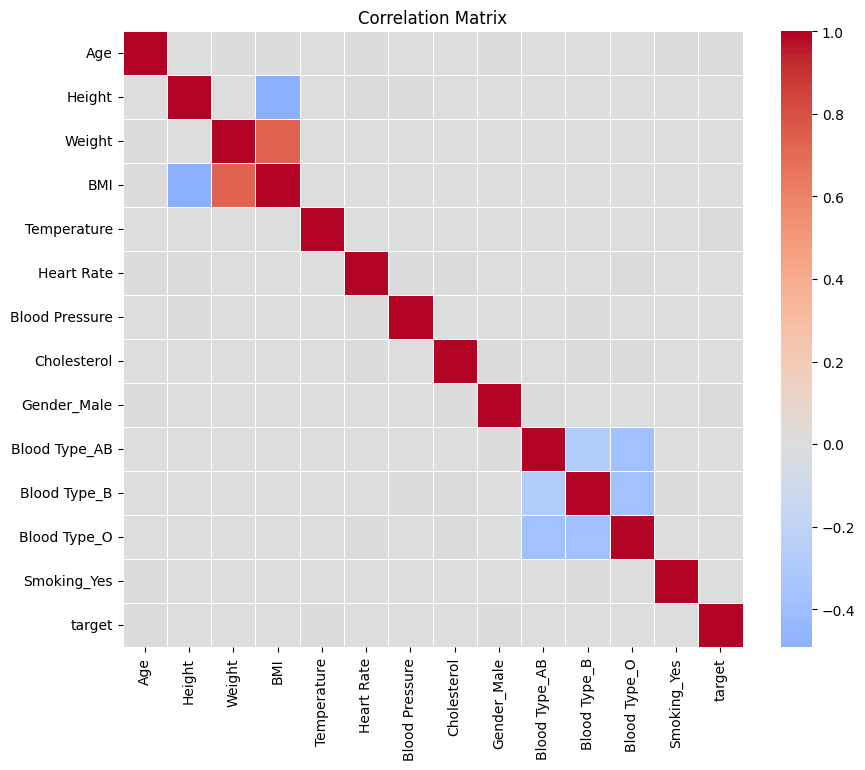


Top 10 features based on absolute correlation:
['Temperature', 'Height', 'Gender_Male', 'Age', 'Cholesterol', 'Blood Type_AB', 'Heart Rate', 'Smoking_Yes', 'Blood Pressure', 'Blood Type_O']


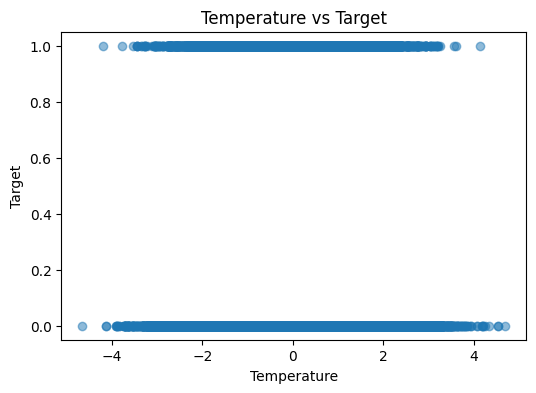

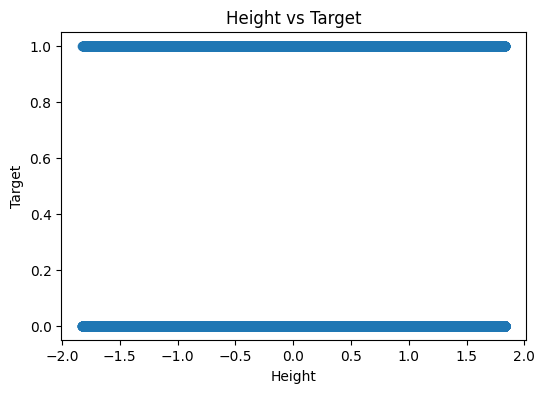

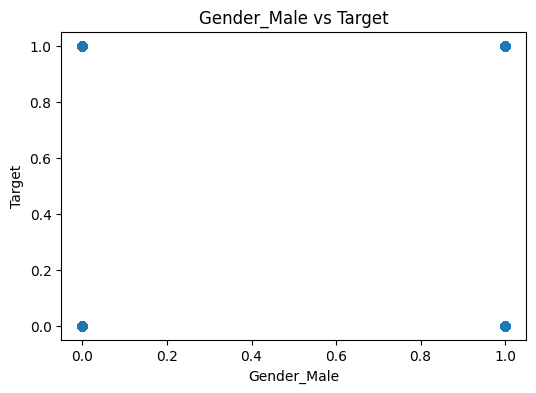

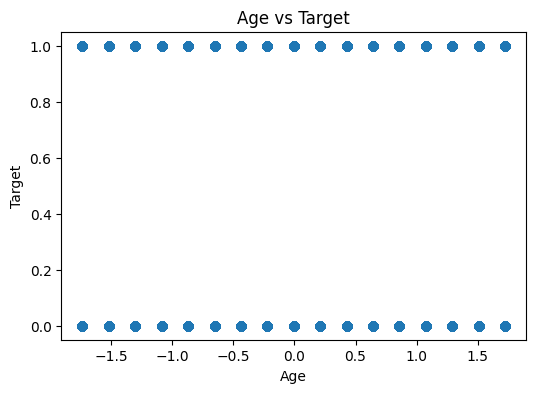

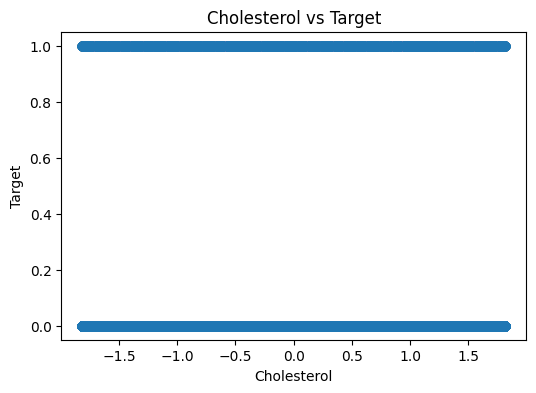

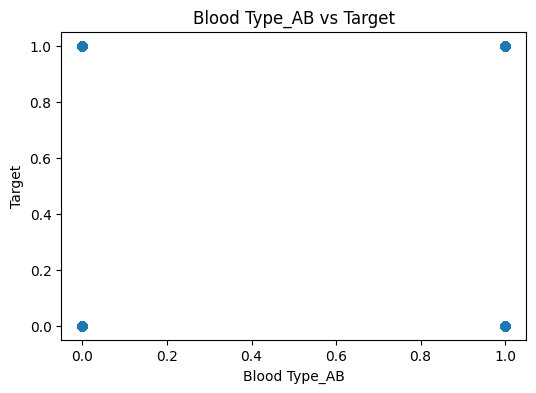

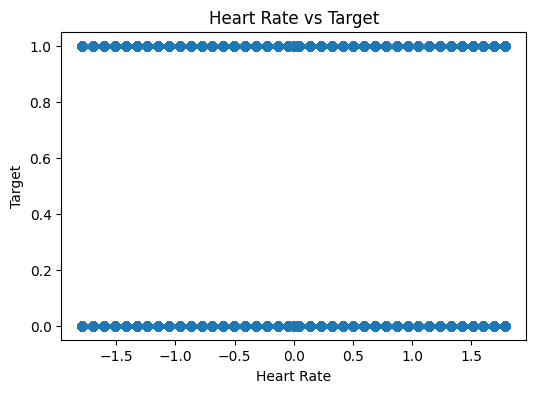

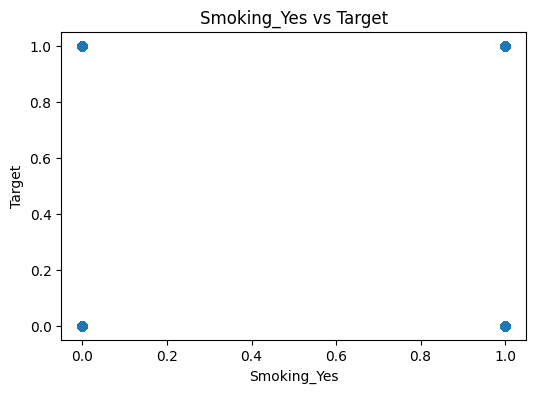

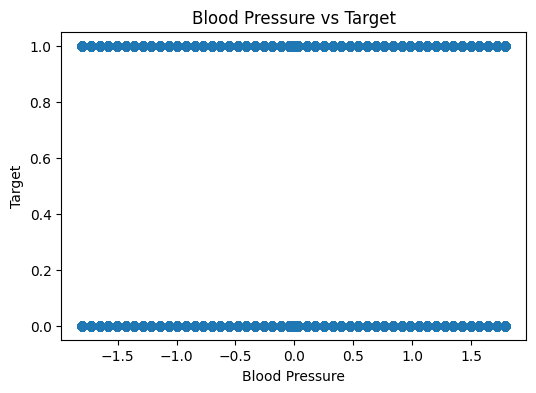

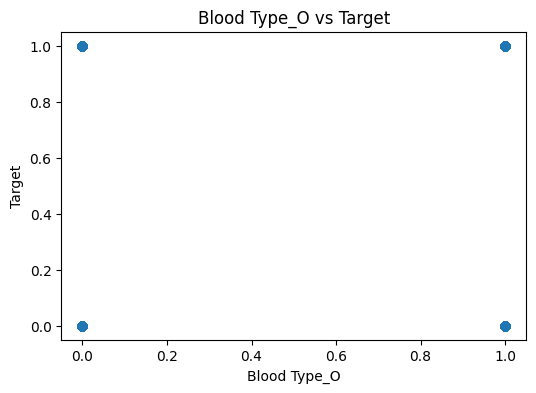


Training Model: fnn_2layer
Epoch [1/20] - Train Loss: 0.6910 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6905 - Val Loss: 0.6909 - Val Acc: 0.8549
Epoch [3/20] - Train Loss: 0.6905 - Val Loss: 0.6904 - Val Acc: 0.8956
Epoch [4/20] - Train Loss: 0.6903 - Val Loss: 0.6908 - Val Acc: 0.8577
Epoch [5/20] - Train Loss: 0.6898 - Val Loss: 0.6901 - Val Acc: 0.8881
Epoch [6/20] - Train Loss: 0.6895 - Val Loss: 0.6913 - Val Acc: 0.8099
Epoch [7/20] - Train Loss: 0.6889 - Val Loss: 0.6903 - Val Acc: 0.8475
Epoch [8/20] - Train Loss: 0.6884 - Val Loss: 0.6911 - Val Acc: 0.8554
Epoch [9/20] - Train Loss: 0.6873 - Val Loss: 0.6913 - Val Acc: 0.7965
Epoch [10/20] - Train Loss: 0.6865 - Val Loss: 0.6914 - Val Acc: 0.7768
Epoch [11/20] - Train Loss: 0.6857 - Val Loss: 0.6930 - Val Acc: 0.8164
Epoch [12/20] - Train Loss: 0.6854 - Val Loss: 0.6940 - Val Acc: 0.7588
Epoch [13/20] - Train Loss: 0.6848 - Val Loss: 0.6919 - Val Acc: 0.7734
Epoch [14/20] - Train Loss: 0.6843 - Val Loss

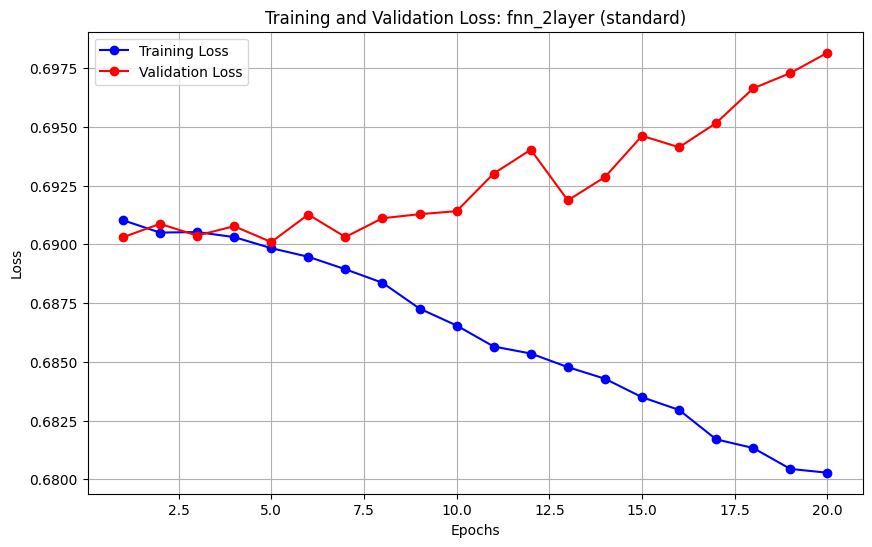

Validation Accuracy: 0.7688

Training Model: fnn_3layer
Epoch [1/20] - Train Loss: 0.6911 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6909 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6906 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6905 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [5/20] - Train Loss: 0.6903 - Val Loss: 0.6902 - Val Acc: 0.8944
Epoch [6/20] - Train Loss: 0.6903 - Val Loss: 0.6905 - Val Acc: 0.8850
Epoch [7/20] - Train Loss: 0.6901 - Val Loss: 0.6903 - Val Acc: 0.8674
Epoch [8/20] - Train Loss: 0.6894 - Val Loss: 0.6903 - Val Acc: 0.8371
Epoch [9/20] - Train Loss: 0.6896 - Val Loss: 0.6908 - Val Acc: 0.8448
Epoch [10/20] - Train Loss: 0.6890 - Val Loss: 0.6918 - Val Acc: 0.8495
Epoch [11/20] - Train Loss: 0.6879 - Val Loss: 0.6915 - Val Acc: 0.8371
Epoch [12/20] - Train Loss: 0.6874 - Val Loss: 0.6941 - Val Acc: 0.7704
Epoch [13/20] - Train Loss: 0.6869 - Val Loss: 0.6929 - Val Acc: 0.8237
Epoch [14/20] - T

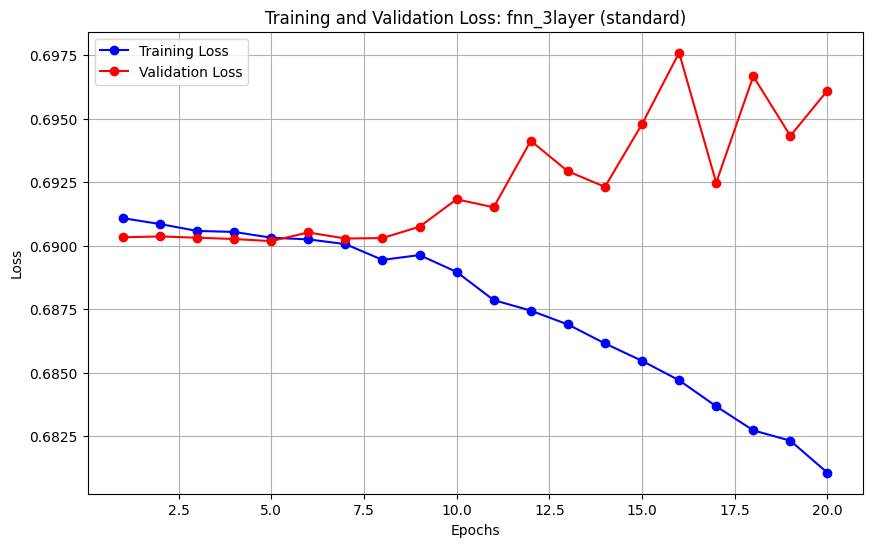

Validation Accuracy: 0.8021

Training Model: fnn_dropout
Epoch [1/20] - Train Loss: 0.6926 - Val Loss: 0.6908 - Val Acc: 0.8994
Epoch [2/20] - Train Loss: 0.6907 - Val Loss: 0.6906 - Val Acc: 0.8990
Epoch [3/20] - Train Loss: 0.6911 - Val Loss: 0.6909 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6907 - Val Loss: 0.6907 - Val Acc: 0.8975
Epoch [5/20] - Train Loss: 0.6908 - Val Loss: 0.6907 - Val Acc: 0.8996
Epoch [6/20] - Train Loss: 0.6906 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [7/20] - Train Loss: 0.6908 - Val Loss: 0.6905 - Val Acc: 0.8918
Epoch [8/20] - Train Loss: 0.6905 - Val Loss: 0.6905 - Val Acc: 0.8997
Epoch [9/20] - Train Loss: 0.6904 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [10/20] - Train Loss: 0.6904 - Val Loss: 0.6904 - Val Acc: 0.8975
Epoch [11/20] - Train Loss: 0.6904 - Val Loss: 0.6904 - Val Acc: 0.8979
Epoch [12/20] - Train Loss: 0.6908 - Val Loss: 0.6904 - Val Acc: 0.8832
Epoch [13/20] - Train Loss: 0.6905 - Val Loss: 0.6911 - Val Acc: 0.8997
Epoch [14/20] - 

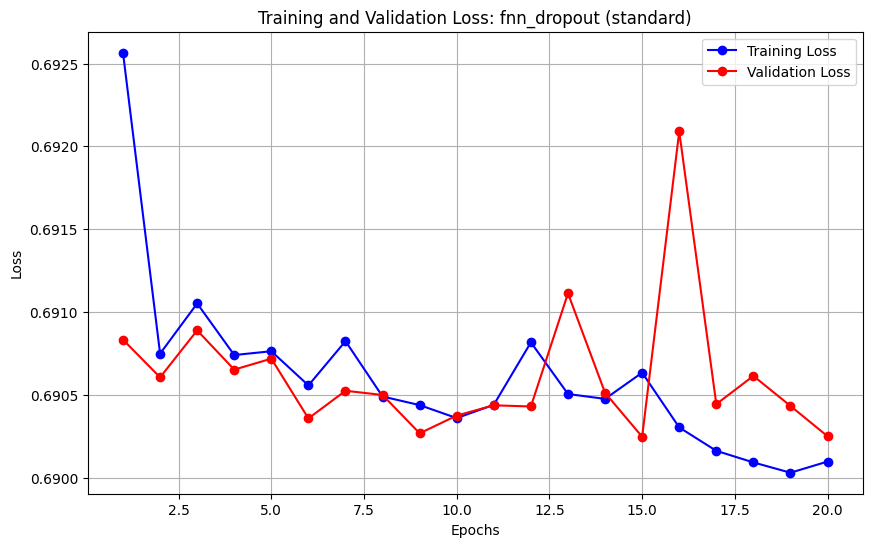

Validation Accuracy: 0.8997

Training Model: fnn_wide
Epoch [1/20] - Train Loss: 0.6909 - Val Loss: 0.6914 - Val Acc: 0.7827
Epoch [2/20] - Train Loss: 0.6906 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6907 - Val Loss: 0.6905 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6903 - Val Loss: 0.6903 - Val Acc: 0.8985
Epoch [5/20] - Train Loss: 0.6904 - Val Loss: 0.6903 - Val Acc: 0.8958
Epoch [6/20] - Train Loss: 0.6901 - Val Loss: 0.6904 - Val Acc: 0.8989
Epoch [7/20] - Train Loss: 0.6899 - Val Loss: 0.6906 - Val Acc: 0.8906
Epoch [8/20] - Train Loss: 0.6894 - Val Loss: 0.6916 - Val Acc: 0.8752
Epoch [9/20] - Train Loss: 0.6889 - Val Loss: 0.6912 - Val Acc: 0.8928
Epoch [10/20] - Train Loss: 0.6888 - Val Loss: 0.6912 - Val Acc: 0.8853
Epoch [11/20] - Train Loss: 0.6883 - Val Loss: 0.6908 - Val Acc: 0.8868
Epoch [12/20] - Train Loss: 0.6878 - Val Loss: 0.6922 - Val Acc: 0.8601
Epoch [13/20] - Train Loss: 0.6873 - Val Loss: 0.6927 - Val Acc: 0.8656
Epoch [14/20] - Tra

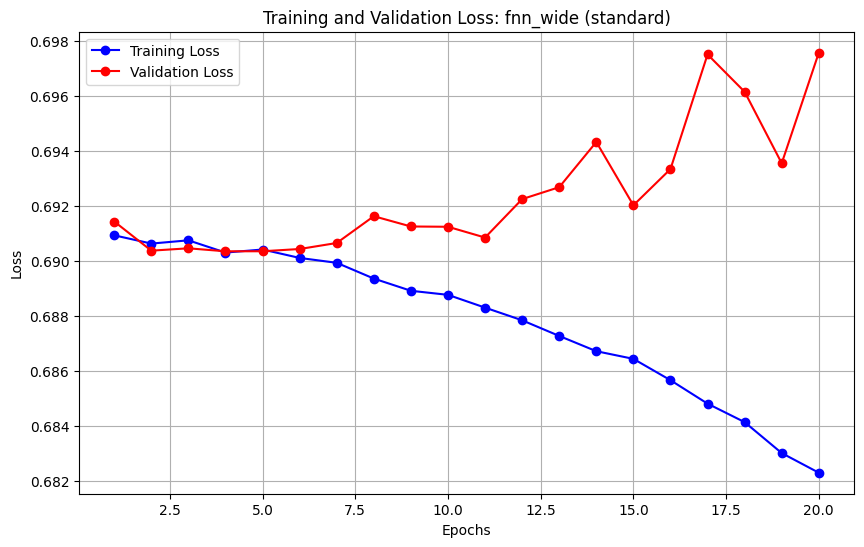

Validation Accuracy: 0.8438

Scaler: minmax
Correlation of each feature with the target:



,abs_correlation
Temperature,0.010034
Height,0.006265
Gender_Male,0.004589
Age,0.004007
Cholesterol,0.002540
Blood Type_AB,0.002126
Heart Rate,0.001956
Smoking_Yes,0.001376
Blood Pressure,0.001247
Blood Type_O,0.000938


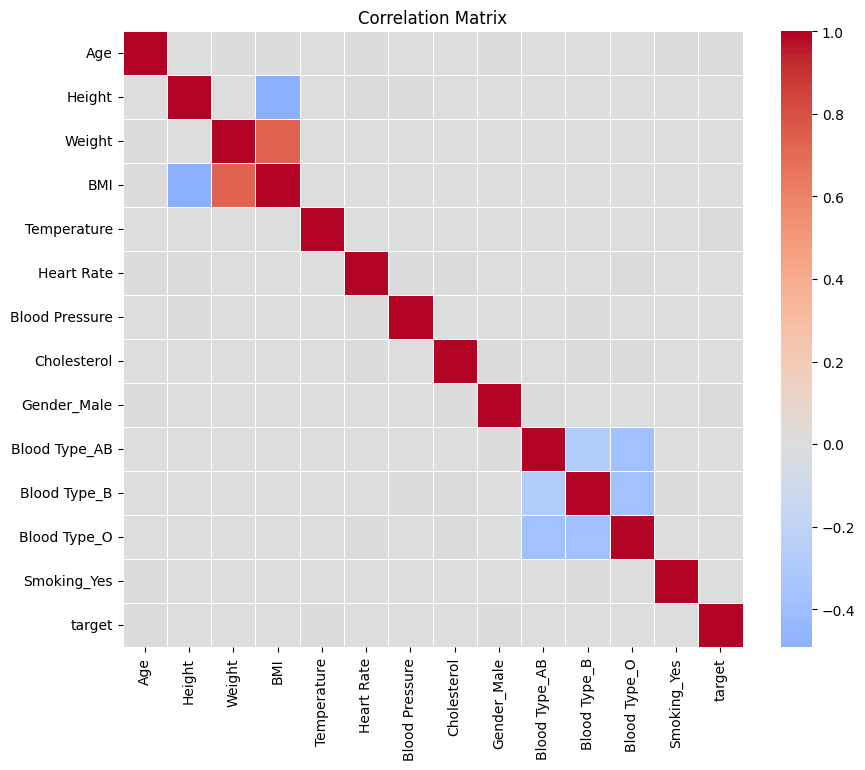


Top 10 features based on absolute correlation:
['Temperature', 'Height', 'Gender_Male', 'Age', 'Cholesterol', 'Blood Type_AB', 'Heart Rate', 'Smoking_Yes', 'Blood Pressure', 'Blood Type_O']


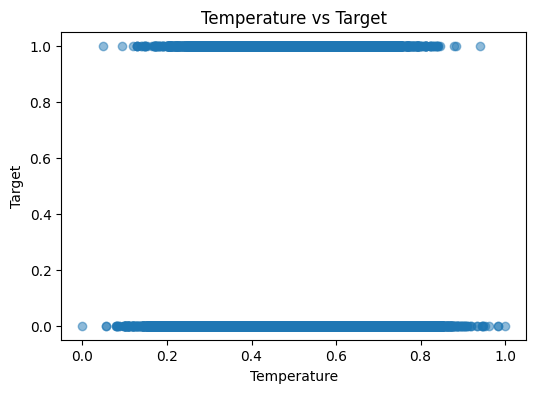

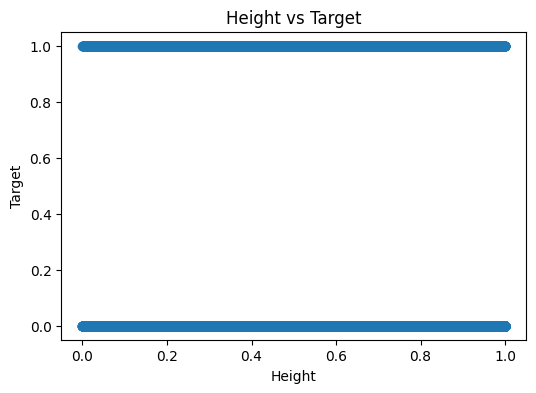

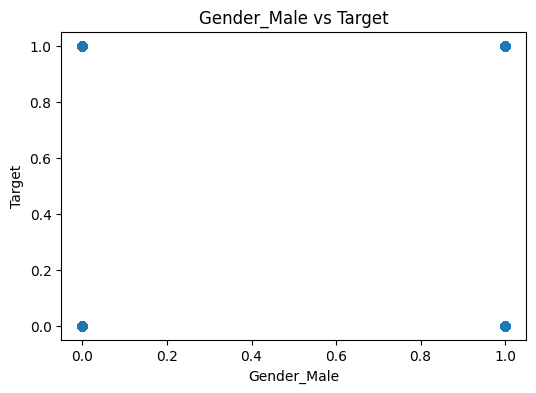

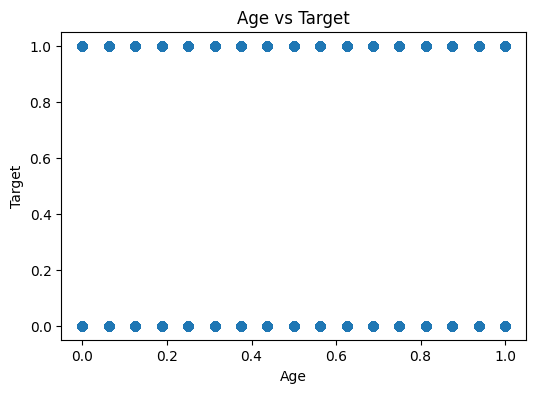

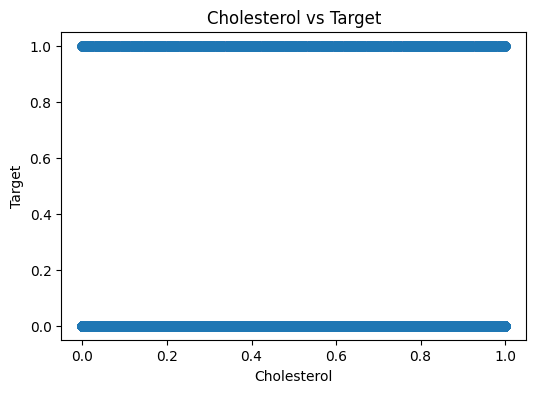

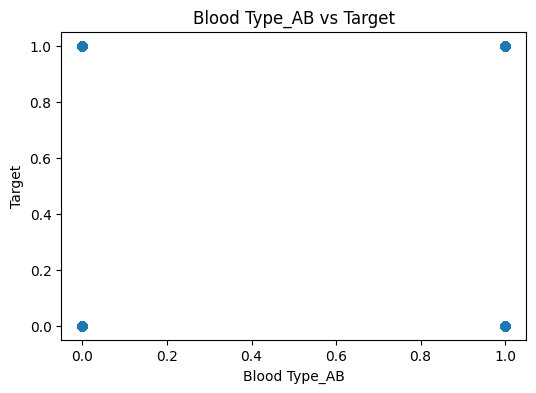

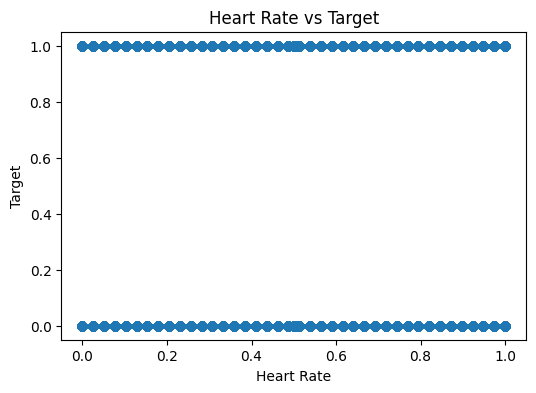

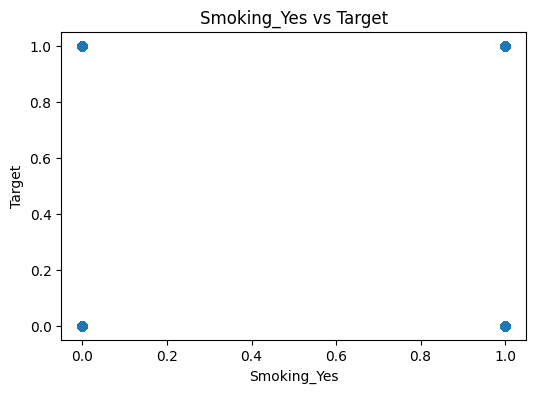

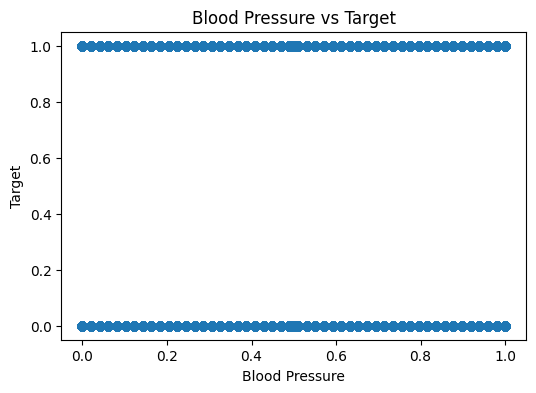

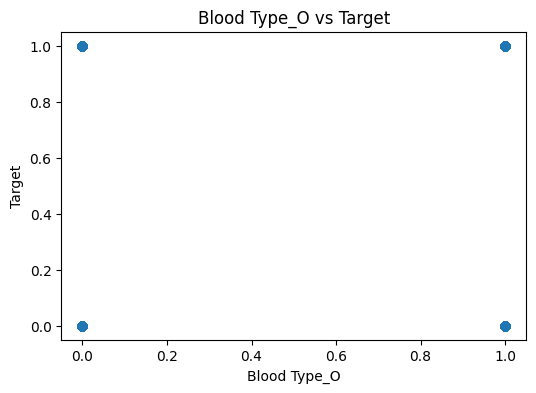


Training Model: fnn_2layer
Epoch [1/20] - Train Loss: 0.6910 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6907 - Val Loss: 0.6911 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6906 - Val Loss: 0.6905 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6907 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [5/20] - Train Loss: 0.6905 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [6/20] - Train Loss: 0.6903 - Val Loss: 0.6906 - Val Acc: 0.8891
Epoch [7/20] - Train Loss: 0.6903 - Val Loss: 0.6903 - Val Acc: 0.8902
Epoch [8/20] - Train Loss: 0.6901 - Val Loss: 0.6902 - Val Acc: 0.8901
Epoch [9/20] - Train Loss: 0.6898 - Val Loss: 0.6901 - Val Acc: 0.8896
Epoch [10/20] - Train Loss: 0.6898 - Val Loss: 0.6903 - Val Acc: 0.8944
Epoch [11/20] - Train Loss: 0.6897 - Val Loss: 0.6905 - Val Acc: 0.8923
Epoch [12/20] - Train Loss: 0.6895 - Val Loss: 0.6909 - Val Acc: 0.8850
Epoch [13/20] - Train Loss: 0.6896 - Val Loss: 0.6913 - Val Acc: 0.8903
Epoch [14/20] - Train Loss: 0.6894 - Val Loss

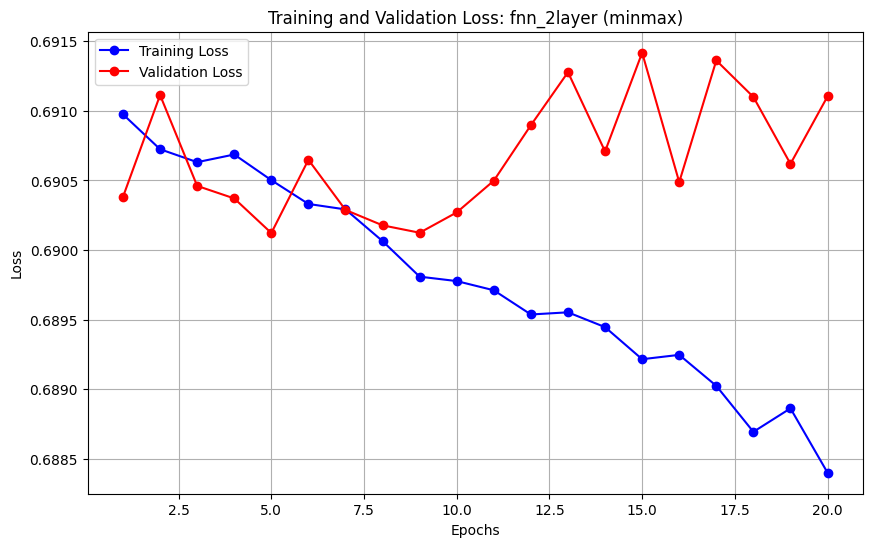

Validation Accuracy: 0.8904

Training Model: fnn_3layer
Epoch [1/20] - Train Loss: 0.6911 - Val Loss: 0.6906 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6909 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6905 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6908 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [5/20] - Train Loss: 0.6908 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [6/20] - Train Loss: 0.6906 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [7/20] - Train Loss: 0.6907 - Val Loss: 0.6911 - Val Acc: 0.8997
Epoch [8/20] - Train Loss: 0.6904 - Val Loss: 0.6900 - Val Acc: 0.8997
Epoch [9/20] - Train Loss: 0.6903 - Val Loss: 0.6906 - Val Acc: 0.8997
Epoch [10/20] - Train Loss: 0.6903 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [11/20] - Train Loss: 0.6901 - Val Loss: 0.6902 - Val Acc: 0.8992
Epoch [12/20] - Train Loss: 0.6898 - Val Loss: 0.6900 - Val Acc: 0.8997
Epoch [13/20] - Train Loss: 0.6901 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [14/20] - T

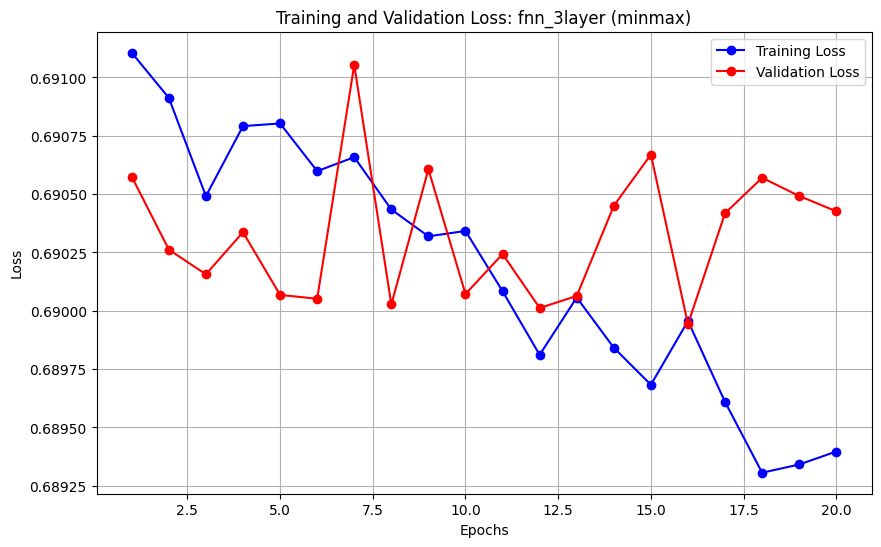

Validation Accuracy: 0.8796

Training Model: fnn_dropout
Epoch [1/20] - Train Loss: 0.6917 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6907 - Val Loss: 0.6909 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6910 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [4/20] - Train Loss: 0.6908 - Val Loss: 0.6905 - Val Acc: 0.8997
Epoch [5/20] - Train Loss: 0.6905 - Val Loss: 0.6905 - Val Acc: 0.8997
Epoch [6/20] - Train Loss: 0.6906 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [7/20] - Train Loss: 0.6908 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [8/20] - Train Loss: 0.6906 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [9/20] - Train Loss: 0.6906 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [10/20] - Train Loss: 0.6909 - Val Loss: 0.6904 - Val Acc: 0.8997
Epoch [11/20] - Train Loss: 0.6907 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [12/20] - Train Loss: 0.6908 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [13/20] - Train Loss: 0.6908 - Val Loss: 0.6903 - Val Acc: 0.8997
Epoch [14/20] - 

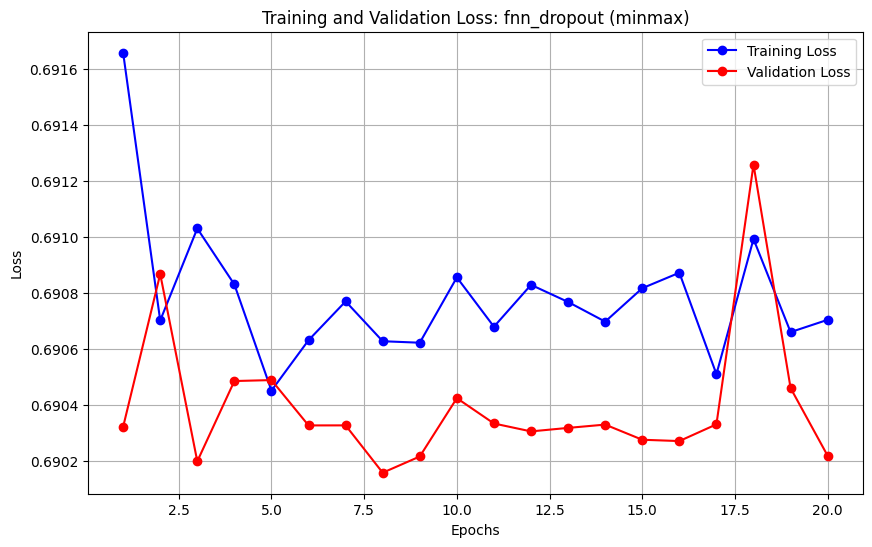

Validation Accuracy: 0.8997

Training Model: fnn_wide
Epoch [1/20] - Train Loss: 0.6911 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [2/20] - Train Loss: 0.6908 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [3/20] - Train Loss: 0.6909 - Val Loss: 0.6917 - Val Acc: 0.8554
Epoch [4/20] - Train Loss: 0.6907 - Val Loss: 0.6902 - Val Acc: 0.8997
Epoch [5/20] - Train Loss: 0.6905 - Val Loss: 0.6903 - Val Acc: 0.8995
Epoch [6/20] - Train Loss: 0.6904 - Val Loss: 0.6901 - Val Acc: 0.8997
Epoch [7/20] - Train Loss: 0.6904 - Val Loss: 0.6904 - Val Acc: 0.8857
Epoch [8/20] - Train Loss: 0.6902 - Val Loss: 0.6907 - Val Acc: 0.8921
Epoch [9/20] - Train Loss: 0.6901 - Val Loss: 0.6903 - Val Acc: 0.8951
Epoch [10/20] - Train Loss: 0.6900 - Val Loss: 0.6906 - Val Acc: 0.8943
Epoch [11/20] - Train Loss: 0.6900 - Val Loss: 0.6904 - Val Acc: 0.8923
Epoch [12/20] - Train Loss: 0.6898 - Val Loss: 0.6909 - Val Acc: 0.8950
Epoch [13/20] - Train Loss: 0.6900 - Val Loss: 0.6902 - Val Acc: 0.8986
Epoch [14/20] - Tra

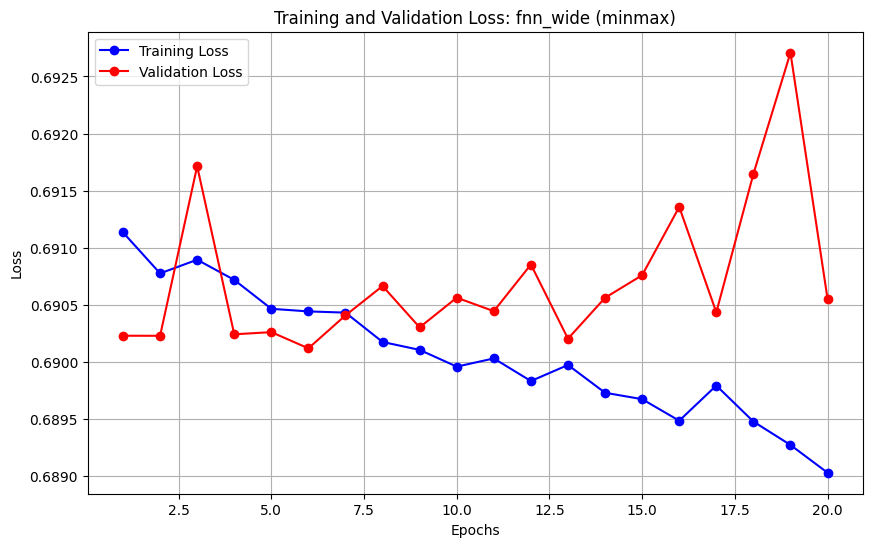

Validation Accuracy: 0.8960


In [70]:
results, trained_models = run_experiments(
    X_train, X_val, X_test,
    y_train, y_val, y_test,
    numeric_cols
)


In [71]:
# Results to Dataframe

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(
    by="val_accuracy",
    ascending=False
).reset_index(drop=True)

results_df.to_csv("experiment_results.csv", index=False)


In [72]:
best_row = results_df.iloc[0]

best_scaler = best_row["scaler"]
best_model_name = best_row["model"]

print("Best Configuration:")
print(best_row)


Best Configuration:
scaler                                                   standard
model                                                 fnn_dropout
val_accuracy                                             0.899664
features        [Temperature, Height, Gender_Male, Age, Choles...
Name: 0, dtype: object


# Final Test Set Evaluation

y_true: [1 0 1 ... 0 0 0]
y_pred: [0 0 0 ... 0 0 0]
y_prob: [0.46081308 0.46081308 0.46081308 ... 0.45913208 0.46081308 0.46081308]

Final Test Set Performance:
Accuracy  : 0.8997
Precision : 0.0000
F1-score  : 0.0000
AUROC     : 0.5030


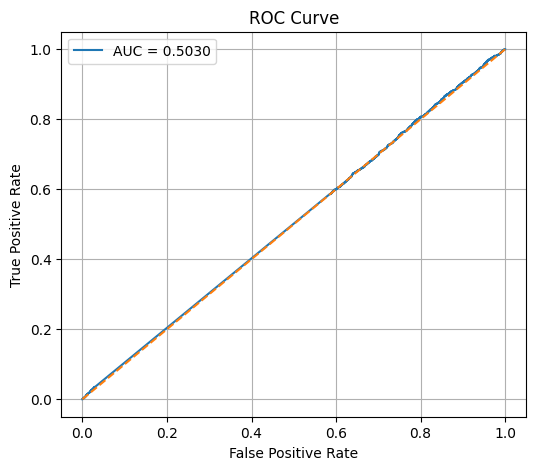

In [73]:
best_model_info = trained_models[(best_scaler, best_model_name)]
best_model = best_model_info["model"]
test_loader = best_model_info["test_loader"]

final_metrics = evaluate_final_model(
    model=best_model,
    test_loader=test_loader,
    device=DEVICE
)


In [74]:
# save the best model

MODEL_PATH = "best_fnn_model.pth"

torch.save(best_model.state_dict(), MODEL_PATH)

print(f"Best model saved to {MODEL_PATH}")


Best model saved to best_fnn_model.pth


In [75]:
# load the model later
# Recreate model architecture
# loaded_model = get_model(
#     model_name=best_model_name,
#     input_dim=X_train_sel.shape[1],
#     num_classes=NUM_CLASSES
# )

# # Load weights
# loaded_model.load_state_dict(
#     torch.load(MODEL_PATH, map_location="cpu")
# )

# loaded_model.eval()
